# Data Reading


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import zscore
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA


import warnings
warnings.filterwarnings('ignore')

In [ ]:
random.seed(42)

#Load the data
df=pd.read_csv('/content/unemployment_analysis.csv')

#Convert string to float
df.iloc[0:,2:] = df.iloc[0:,2:].applymap(lambda x: str(x).replace('lacs','').strip())
df.iloc[0:,2:] = df.iloc[0:,2:].astype(float).fillna(0.0)

df.head()


,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.8,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.8,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.6,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.1,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.3,11.47,13.33,11.82


In [ ]:
#Print the data type of each column
print(df.dtypes)


Country Name    object
Country Code    object
1991            object
1992            object
1993            object
1994            object
1995            object
1996            object
1997            object
1998            object
1999            object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
2019            object
2020            object
2021            object
dtype: object


In [ ]:
#Print Country name with its respective Code:
print(df[['Country Name','Country Code']].drop_duplicates())

                    Country Name Country Code
0    Africa Eastern and Southern          AFE
1                    Afghanistan          AFG
2     Africa Western and Central          AFW
3                         Angola          AGO
4                        Albania          ALB
..                           ...          ...
230                        Samoa          WSM
231                  Yemen, Rep.          YEM
232                 South Africa          ZAF
233                       Zambia          ZMB
234                     Zimbabwe          ZWE

[235 rows x 2 columns]


In [ ]:
#Find the total number of Unemployed people in each Country:

df['Total_Unemployed']=df.iloc[0:,2:].sum(axis=1)
print(df[['Country Name','Total_Unemployed']].drop_duplicates())

                    Country Name  Total_Unemployed
0    Africa Eastern and Southern            224.57
1                    Afghanistan            345.38
2     Africa Western and Central            153.27
3                         Angola            169.02
4                        Albania            505.86
..                           ...               ...
230                        Samoa            180.98
231                  Yemen, Rep.            365.60
232                 South Africa            875.21
233                       Zambia            407.96
234                     Zimbabwe            160.50

[235 rows x 2 columns]


# Data Cleaning

In [ ]:
#Check missing values

def missing_values(value):
  return value.isna().sum()

missing_values = df.apply(missing_values)
print(missing_values)



Country Name        0
Country Code        0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
2018                0
2019                0
2020                0
2021                0
Total_Unemployed    0
dtype: int64


There are missing values in the year 2000 and in 2015. So we need fill those values with mean value for each country.

In [ ]:
row_mean = df.mean(axis=1)
df = df.apply(lambda x: x.fillna(row_mean[x.name]), axis=1)   # x.name gives the index label of the current row
print(df.isnull().sum())


Country Name        0
Country Code        0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010                0
2011                0
2012                0
2013                0
2014                0
2015                0
2016                0
2017                0
2018                0
2019                0
2020                0
2021                0
Total_Unemployed    0
dtype: int64


Now there are no missing values

   Country Name Country Code  1991  1992  1993  1994  1995  1996  1997  1998  \
18      Bahrain          BHR  1.01  1.05  1.01  1.11  1.08  1.08  1.09  1.08   

    ...  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
18  ...   1.2  1.18  1.19   1.2  1.19  1.18   1.2   1.2  1.78  1.87  

[1 rows x 33 columns]


<Axes: >

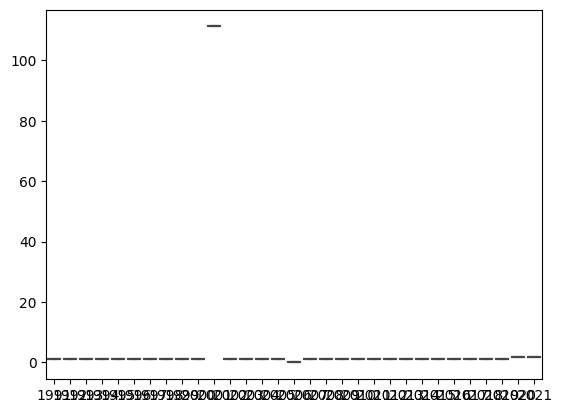

In [ ]:
import seaborn as sns
df=df.drop('Total_Unemployed',axis=1)
subset_df=df[df['Country Name'].isin(['Behnin','Bahrain'])]

# calculate interquartile range for each column
Q1 = subset_df.quantile(0.25)
Q3 = subset_df.quantile(0.75)
IQR = Q3 - Q1

# detect outliers for each column
outliers = ((subset_df < (Q1 - 1.5 * IQR)) | (subset_df > (Q3 + 1.5 * IQR))).any()

# replace outliers with mean/median/mode
for col in subset_df.columns:
    if outliers[col]:
        # calculate the replacement value (e.g. median)
        replacement = subset_df[col].median()
        # replace the outliers with the calculated value
        subset_df[col] = np.where((subset_df[col] < (Q1[col] - 1.5 * IQR[col])) | (subset_df[col] > (Q3[col] + 1.5 * IQR[col])), replacement, subset_df[col])

# display the updated subset DataFrame
print(subset_df)
sns.boxplot(subset_df)


In [ ]:
#Melt the dataframe to unpivot the 'Year' columns
df_pivot = df.melt(id_vars=['Country Name','Country Code'], var_name='Year',value_name='No of Unemployed')

# Sort the dataframe by 'Country' and 'Year'
df_pivot = df_pivot.sort_values(by=['Country Name','Country Code','Year'])

# Reset the index of the dataframe
df_pivot = df_pivot.reset_index(drop=True)

# Create a new column named 'No of unemployed' and insert the values
for country in df_pivot['Country Name'].unique():
    df_pivot.loc[df_pivot['Country Name']==country, 'No of Unemployed'] = df_pivot.loc[df_pivot['Country Name']==country, 'No of Unemployed']

print(df_pivot)



     Country Name Country Code  Year  No of Unemployed
0     Afghanistan          AFG  1991             10.65
1     Afghanistan          AFG  1992             10.82
2     Afghanistan          AFG  1993             10.72
3     Afghanistan          AFG  1994             10.73
4     Afghanistan          AFG  1995             11.18
...           ...          ...   ...               ...
7280     Zimbabwe          ZWE  2017              4.78
7281     Zimbabwe          ZWE  2018              4.80
7282     Zimbabwe          ZWE  2019              4.83
7283     Zimbabwe          ZWE  2020              5.35
7284     Zimbabwe          ZWE  2021              5.17

[7285 rows x 4 columns]


In [ ]:
df_pivot=df_pivot.rename(columns={'Country Name':'Country_name'})
df_pivot=df_pivot.rename(columns={'Country Code':'Country_code'})

print(df_pivot)

     Country_name Country_code  Year  No of Unemployed
0     Afghanistan          AFG  1991             10.65
1     Afghanistan          AFG  1992             10.82
2     Afghanistan          AFG  1993             10.72
3     Afghanistan          AFG  1994             10.73
4     Afghanistan          AFG  1995             11.18
...           ...          ...   ...               ...
7280     Zimbabwe          ZWE  2017              4.78
7281     Zimbabwe          ZWE  2018              4.80
7282     Zimbabwe          ZWE  2019              4.83
7283     Zimbabwe          ZWE  2020              5.35
7284     Zimbabwe          ZWE  2021              5.17

[7285 rows x 4 columns]


In [ ]:

def descriptive_stats(country_code):

    # Filter data for the specified country
    df_country = df_pivot[df_pivot['Country_code'] == country_code]

    # Compute mean, median, mode, and standard deviation
    mean = df_country['No of Unemployed'].mean().item()
    median = df_country['No of Unemployed'].median().item()
    mode = stats.mode(df_country['No of Unemployed'],axis=None)[0][0]
    std_dev = df_country['No of Unemployed'].std().item()

    # Print the statistics
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    print(f"Standard deviation: {std_dev:.2f}")

    # Get the year with maximum and minimum unemployment
    max_year = df_country['Year'].loc[df_country['No of Unemployed'].idxmax()]
    min_year = df_country['Year'].loc[df_country['No of Unemployed'].idxmin()]

   # Print the results
    print(f'\nYear with maximum unemployment {max_year}\nYear with minimum unemployment {min_year}')

descriptive_stats('WSM')

Mean: 5.84
Median: 5.36
Mode: 2.10
Standard deviation: 2.28

Year with maximum unemployment 2021
Year with minimum unemployment 1991


In [ ]:
#Top 5 countries with highest unemployemt in year 2021
df_pivot['Year'] = df_pivot['Year'].astype(int)
df_pivot['No of Unemployed'] = df_pivot['No of Unemployed'].astype(float)
top_5_countries=df_pivot[df_pivot['Year']==2021].sort_values(by='No of Unemployed', ascending=False).head(5)['Country_name']
print(top_5_countries)

5982          South Africa
1611              Djibouti
1983              Eswatini
7160    West Bank and Gaza
743               Botswana
Name: Country_name, dtype: object


In [ ]:
#Top 3 countries with unemployement more than 5 lcs in 2021
top_3_countries=df_pivot[(df_pivot['Year']==2021) & (df_pivot['No of Unemployed']> 5.0)].sort_values(by='No of Unemployed',ascending=False).head(3)['Country_name']
print(top_3_countries)

5982    South Africa
1611        Djibouti
1983        Eswatini
Name: Country_name, dtype: object


In [ ]:
# Convert the top 3 countries to a list
top_5_countries = list(top_5_countries)

# Filter the df_pivot dataframe by the top 3 countries and the years 1991 to 2021
df_top_5 = df_pivot[(df_pivot['Country_name'].isin(top_5_countries)) & (df_pivot['Year'] >= 1991) & (df_pivot['Year'] <= 2021)]

#Create an empty change list
change_list=[]

# Calculate the percentage change in unemployment for each country
for country in top_5_countries:
    df_country = df_top_5[df_top_5['Country_name'] == country]
    unemployment_vals = df_country['No of Unemployed'].values
    changes = [(unemployment_vals[i] - unemployment_vals[i+1])/unemployment_vals[i] for i in range(len(unemployment_vals)-1)]
    changes.insert(0,0)
    change_list+=changes
    print(f"Percentage change in unemployment for {country}:")
    for i, change in enumerate(changes):
        print(f"Change in {df_country['Year'].values[i]}: {change:.2%}")

Percentage change in unemployment for South Africa:
Change in 1991: 0.00%
Change in 1992: -0.10%
Change in 1993: 0.20%
Change in 1994: 0.10%
Change in 1995: 0.00%
Change in 1996: 0.07%
Change in 1997: -0.13%
Change in 1998: -0.13%
Change in 1999: 0.13%
Change in 2000: 0.10%
Change in 2001: -2.71%
Change in 2002: -8.47%
Change in 2003: 2.94%
Change in 2004: 8.85%
Change in 2005: 1.12%
Change in 2006: 2.68%
Change in 2007: 6.35%
Change in 2008: 15.56%
Change in 2009: -4.95%
Change in 2010: -4.93%
Change in 2011: 0.16%
Change in 2012: -0.37%
Change in 2013: 0.69%
Change in 2014: -1.34%
Change in 2015: -1.04%
Change in 2016: -5.53%
Change in 2017: -1.88%
Change in 2018: 0.48%
Change in 2019: -5.80%
Change in 2020: -2.63%
Change in 2021: -14.85%
Percentage change in unemployment for Djibouti:
Change in 1991: 0.00%
Change in 1992: 0.54%
Change in 1993: 0.03%
Change in 1994: 0.58%
Change in 1995: 0.28%
Change in 1996: 0.35%
Change in 1997: 0.49%
Change in 1998: 0.42%
Change in 1999: 0.52%
Cha

# Prescriptive Statistics

In [ ]:
#Year in which country having country_code ‘BGR’ had the minimum unemployment issue.
descriptive_stats('BGR')

Mean: 10.92
Median: 11.26
Mode: 11.10
Standard deviation: 4.06

Year with maximum unemployment 2001
Year with minimum unemployment 2019


In 2019, BGR had the minimum unemployemnt issue

In [ ]:
#Adding Percentage change column in the data frame
df_top_5['Percentage change']=change_list
df_top_5=df_top_5.drop(columns=['Year','No of Unemployed'])
df_top_5

,Country_name,Country_code,Percentage change
713,Botswana,BWA,0.000000
714,Botswana,BWA,-0.001002
715,Botswana,BWA,0.002001
716,Botswana,BWA,0.001003
717,Botswana,BWA,0.000000
...,...,...,...
7156,West Bank and Gaza,PSE,-0.025678
7157,West Bank and Gaza,PSE,-0.023180
7158,West Bank and Gaza,PSE,-0.024468
7159,West Bank and Gaza,PSE,-0.102609


In [ ]:
descriptive_stats('JPN')

Mean: 3.76
Median: 3.89
Mode: 2.80
Standard deviation: 1.00

Year with maximum unemployment 2002
Year with minimum unemployment 1991


Minimum unemployment year=1991,hence we can only compare with the next year that is year 1992 and not with 1990 as we don't have data for it.

In [ ]:
unemployment_1991 = df_pivot.loc[df_pivot['Year'] == 1991, 'No of Unemployed'].values[0]
print(f"The number of unemployed in Japan in 1991 was {unemployment_1991:.2f}")

unemployment_1992 = df_pivot.loc[df_pivot['Year'] == 1992, 'No of Unemployed'].values[0]
print(f"The number of unemployed in Japan in 1992 was {unemployment_1992:.2f}")

The number of unemployed in Japan in 1991 was 10.65
The number of unemployed in Japan in 1992 was 10.82


In [ ]:
countries = ['MDA', 'NAC', 'PAN', 'PAK', 'UGA']

df_countries=df_pivot[(df_pivot['Country_code'].isin(countries)) & (df_pivot['Year'].isin(['2019', '2020']))]
#print(len(df_countries))

df_pivot['Country_code'].unique()
df_pivot['Year'].unique()


array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

We can conclude from the above data that year 1992 there was rise in the unemployement and that rise was about 0.17.

As we are getting empty lists, we can conclude that  there were no countries among the mentioned countries which saw an upward or downward jump.

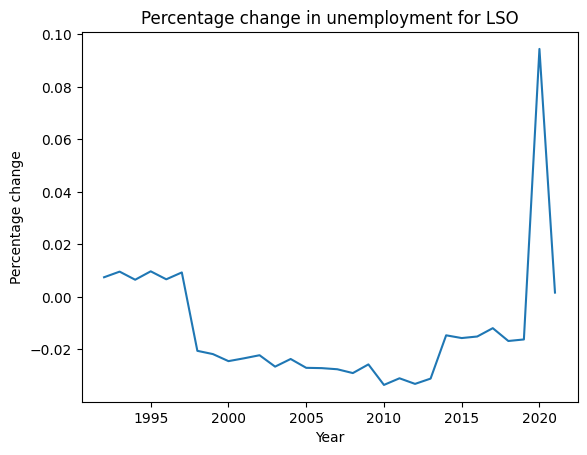

In [ ]:
# Select rows where Country_code is LSO
df_lso = df_pivot[df_pivot['Country_code'] == 'LSO']

# Compute percentage change column
df_lso['Percentage change'] = df_lso['No of Unemployed'].pct_change()

# Plot the percentage change
plt.plot(df_lso['Year'], df_lso['Percentage change'])
plt.xlabel('Year')
plt.ylabel('Percentage change')
plt.title('Percentage change in unemployment for LSO')
plt.show()



From the graph, it's seen that from years 1991 to 1997 there were very slight upward and downward movements, then there was a high downward movement from 1997 to 1999.

After that it's seen that there were again slight downward and upward movements but from year 2019 there was a high upward movement and again fromyear 2020 to 2021 there was a high downward movement.

In [ ]:
def predict_future(consecutive_years):
    # load data into a pandas dataframe
    data = df_pivot

    # convert "Year" column to datetime format
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')

    # set "Year" column as the index
    data = data.set_index('Year')

    print(data.index)

    # apply moving average model
    data['moving_average'] = data['No of Unemployed'].rolling(window=3).mean()

    # apply ARIMA model
    model = ARIMA(data['No of Unemployed'], order=(1, 1, 1))
    arima_fit = model.fit()
    arima_forecast = arima_fit.forecast(steps=2)

    # Add 2022 forecast to DataFrame
    data.loc[pd.to_datetime('2022-01-01')] = [arima_forecast[0], None]

   # Add 2023 forecast to DataFrame
    data.loc[pd.to_datetime('2023-01-01')] = [arima_forecast[1], None]

    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast['2022-01-01'], None]
    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast['2023-01-01'], None]


    forecast_date = datetime.strptime('2022-01-01', '%Y-%m-%d').date()
    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast[forecast_date], None]

    forecast_date = datetime.strptime('2023-01-01', '%Y-%m-%d').date()
    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast[forecast_date], None]
    data['arima_forecast'] = pd.concat([data['No of Unemployed'], arima_fit.predict(start='2022-01-01', end='2023-01-01')]).reset_index(drop=True)

    # plot the actual and forecasted values
    data.plot(y=['No of Unemployed', 'moving_average', 'arima_forecast'], kind='line')

    # calculate MAPE for both models
    mape_ma = MAPE(data['No of Unemployed'].tail(consecutive_years), data['moving_average'].tail(consecutive_years))
    mape_arima = MAPE(data['No of Unemployed'].tail(consecutive_years), data['arima_forecast'].tail(consecutive_years))

    # find the maximum and minimum number of unemployed for each country for 2022 and 2023
    max_min_data = data.loc[data.index.year.isin([2022, 2023])].groupby(['Country_name'])['No of Unemployed'].agg(['max', 'min'])

    # find the forecasted year with the maximum overall unemployment
    max_unemployed_year = data[['No of Unemployed', 'arima_forecast']].sum(axis=1).idxmax().year

    # find which countries' unemployment in 2022 increased compared to 2021
    increased_countries = data.loc[data.index.year.isin([2021, 2022])].groupby(['Country_name'])['No of Unemployed'].agg(lambda x: x.iloc[1] > x.iloc[0])

    return max_min_data, max_unemployed_year, increased_countries

def MAPE(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100




In [ ]:
def predict_future(consecutive_years):
    # load data into a pandas dataframe
    data = df_pivot

    # convert "Year" column to datetime format
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')

    # set "Year" column as the index
    data = data.set_index('Year')

    print(data.index)

    # apply moving average model
    data['moving_average'] = data['No of Unemployed'].rolling(window=3).mean()

    # apply ARIMA model
    model = ARIMA(data['No of Unemployed'], order=(1, 1, 1))
    arima_fit = model.fit()
    arima_forecast = arima_fit.forecast(steps=2)

    # Add 2022 forecast to DataFrame
    data.loc[pd.to_datetime('2022-01-01')] = [arima_forecast[0], None]

   # Add 2023 forecast to DataFrame
    data.loc[pd.to_datetime('2023-01-01')] = [arima_forecast[1], None]

    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast[0], None]
    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast[1], None]


    forecast_date = datetime.strptime('2022-01-01', '%Y-%m-%d').date()
    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast[forecast_date.year], None]

    forecast_date = datetime.strptime('2023-01-01', '%Y-%m-%d').date()
    data.loc[data.index[-1] + pd.DateOffset(years=1)] = [arima_forecast[forecast_date.year], None]
    data['arima_forecast'] = pd.concat([data['No of Unemployed'], arima_fit.predict(start='2022-01-01', end='2023-01-01')]).reset_index(drop=True)

    # plot the actual and forecasted values
    data.plot(y=['No of Unemployed', 'moving_average', 'arima_forecast'], kind='line')

    # calculate MAPE for both models
    mape_ma = MAPE(data['No of Unemployed'].tail(consecutive_years), data['moving_average'].tail(consecutive_years))
    mape
